# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = (x / 128.)-1

    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 512, 256, 256, 128, 128, 128, 64, 32, 16]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu")(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu")(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

# model = build_mlp(input_shape=x_train.shape[1:])
# model.summary()

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95


In [9]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
optimizers = [keras.optimizers.SGD(lr=1e-3, nesterov=True, momentum=MOMENTUM),
              keras.optimizers.RMSprop(),
             keras.optimizers.Adagrad(),
             keras.optimizers.Adam()]

for optimizer in optimizers:
    print(f"Experiment with Optimizer: {optimizer}")
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
#     optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-optimizer-%s" % str(optimizer)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
    
#     keras.backend.clear_session() # 把舊的 Graph 清掉


Experiment with Optimizer: <keras.optimizers.SGD object at 0x000001E148FAEFD0>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_34 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_35 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_36 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_37 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_38 (Dense)             (None, 128)               32896     
_______________________________________________________________

50000/50000 [==============================] - 2s 45us/step - loss: 0.1366 - acc: 0.9529 - val_loss: 3.6118 - val_acc: 0.4911
Epoch 46/50
50000/50000 [==============================] - 2s 45us/step - loss: 0.1351 - acc: 0.9530 - val_loss: 3.6281 - val_acc: 0.4893
Epoch 47/50
50000/50000 [==============================] - 2s 44us/step - loss: 0.1284 - acc: 0.9571 - val_loss: 3.8575 - val_acc: 0.4819
Epoch 48/50
50000/50000 [==============================] - 2s 44us/step - loss: 0.1194 - acc: 0.9597 - val_loss: 3.6789 - val_acc: 0.4954
Epoch 49/50
50000/50000 [==============================] - 2s 44us/step - loss: 0.1118 - acc: 0.9610 - val_loss: 3.8342 - val_acc: 0.4889
Epoch 50/50
50000/50000 [==============================] - 2s 44us/step - loss: 0.1155 - acc: 0.9611 - val_loss: 3.7235 - val_acc: 0.4975
Experiment with Optimizer: <keras.optimizers.RMSprop object at 0x000001E148C502E8>
_________________________________________________________________
Layer (type)                 Output

50000/50000 [==============================] - 2s 48us/step - loss: 0.1783 - acc: 0.9430 - val_loss: 2.9460 - val_acc: 0.5272
Epoch 40/50
50000/50000 [==============================] - 2s 48us/step - loss: 0.1790 - acc: 0.9448 - val_loss: 3.2415 - val_acc: 0.5229
Epoch 41/50
50000/50000 [==============================] - 2s 48us/step - loss: 0.1734 - acc: 0.9458 - val_loss: 3.0921 - val_acc: 0.5291
Epoch 42/50
50000/50000 [==============================] - 2s 48us/step - loss: 0.1677 - acc: 0.9487 - val_loss: 2.9931 - val_acc: 0.5196
Epoch 43/50
50000/50000 [==============================] - 2s 48us/step - loss: 0.1666 - acc: 0.9479 - val_loss: 2.9361 - val_acc: 0.5343
Epoch 44/50
50000/50000 [==============================] - 2s 48us/step - loss: 0.1633 - acc: 0.9518 - val_loss: 2.9518 - val_acc: 0.5383
Epoch 45/50
50000/50000 [==============================] - 2s 49us/step - loss: 0.1593 - acc: 0.9516 - val_loss: 3.0155 - val_acc: 0.5322
Epoch 46/50
50000/50000 [=====================

50000/50000 [==============================] - 2s 46us/step - loss: 0.0642 - acc: 0.9806 - val_loss: 3.9924 - val_acc: 0.5190
Epoch 34/50
50000/50000 [==============================] - 2s 46us/step - loss: 0.0452 - acc: 0.9860 - val_loss: 4.0777 - val_acc: 0.5184
Epoch 35/50
50000/50000 [==============================] - 2s 46us/step - loss: 0.0332 - acc: 0.9902 - val_loss: 4.2915 - val_acc: 0.5192
Epoch 36/50
50000/50000 [==============================] - 2s 46us/step - loss: 0.0512 - acc: 0.9842 - val_loss: 4.6315 - val_acc: 0.5004
Epoch 37/50
50000/50000 [==============================] - 2s 46us/step - loss: 0.0608 - acc: 0.9838 - val_loss: 4.1939 - val_acc: 0.5190
Epoch 38/50
50000/50000 [==============================] - 2s 46us/step - loss: 0.0188 - acc: 0.9951 - val_loss: 4.2769 - val_acc: 0.5210
Epoch 39/50
50000/50000 [==============================] - 2s 46us/step - loss: 0.0124 - acc: 0.9972 - val_loss: 4.4333 - val_acc: 0.5285
Epoch 40/50
50000/50000 [=====================

50000/50000 [==============================] - 3s 52us/step - loss: 0.2141 - acc: 0.9278 - val_loss: 2.5070 - val_acc: 0.5382ss: 0.2136 - acc: 0.927
Epoch 28/50
50000/50000 [==============================] - 3s 52us/step - loss: 0.1985 - acc: 0.9334 - val_loss: 2.5595 - val_acc: 0.5357
Epoch 29/50
50000/50000 [==============================] - 3s 51us/step - loss: 0.1890 - acc: 0.9363 - val_loss: 2.5979 - val_acc: 0.5361
Epoch 30/50
50000/50000 [==============================] - 3s 51us/step - loss: 0.1771 - acc: 0.9409 - val_loss: 2.6364 - val_acc: 0.5365
Epoch 31/50
50000/50000 [==============================] - 3s 52us/step - loss: 0.1691 - acc: 0.9427 - val_loss: 2.8224 - val_acc: 0.5336
Epoch 32/50
50000/50000 [==============================] - 3s 51us/step - loss: 0.1714 - acc: 0.9416 - val_loss: 2.7981 - val_acc: 0.5308
Epoch 33/50
50000/50000 [==============================] - 3s 51us/step - loss: 0.1485 - acc: 0.9516 - val_loss: 2.8055 - val_acc: 0.5317
Epoch 34/50
50000/50000

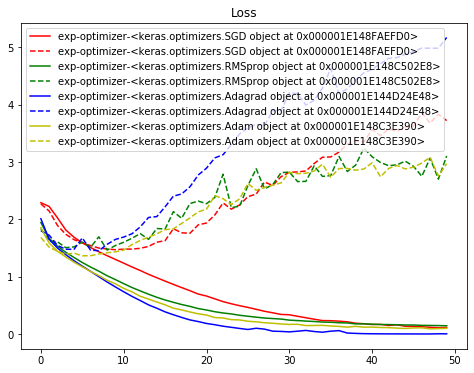

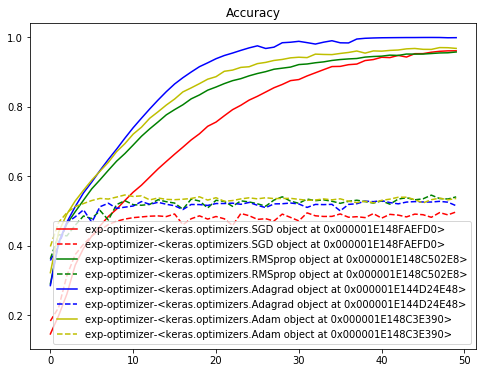

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()